Final MSE (Trace of M) = 0.0132


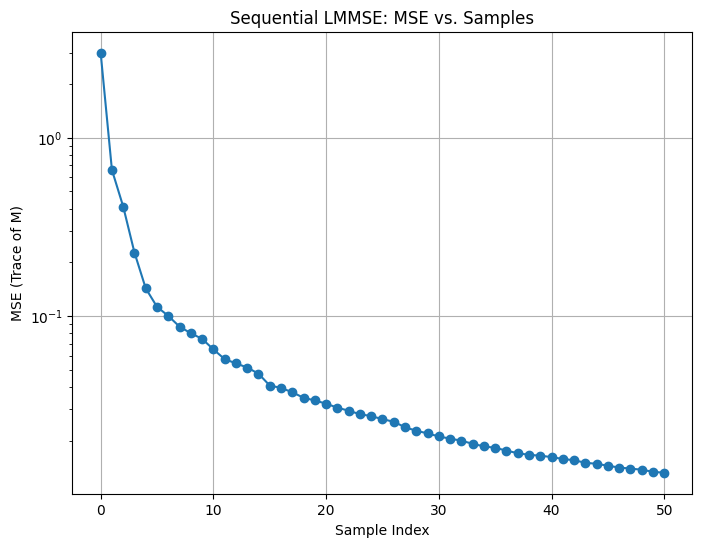

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_samples = 50
sigma_w = 1.0
p = 3
N = 5

theta_true = np.random.randn(p)

theta_hat = np.zeros(p)
M = np.eye(p)

mse_values = [np.trace(M)]

for n in range(1, num_samples + 1):
    # Observation matrix
    H_n = np.random.randn(N, p)

    # Noise
    w_n = np.random.normal(0, sigma_w, size=(N,))

    # Model
    x_n = H_n @ theta_true + w_n

    # K[n]
    S = H_n @ M @ H_n.T + sigma_w**2 * np.eye(N)
    K_n = M @ H_n.T @ np.linalg.inv(S)

    # theta_hat[n]
    theta_hat = theta_hat + K_n @ (x_n - H_n @ theta_hat)

    # Update M[n]
    M = (np.eye(p) - K_n @ H_n) @ M

    mse_values.append(np.trace(M))

print(f"Final MSE (Trace of M) = {np.trace(M):.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(num_samples + 1), mse_values, marker='o')
plt.xlabel("Sample Index")
plt.ylabel("MSE (Trace of M)")
plt.yscale('log')
plt.title("Sequential LMMSE: MSE vs. Samples")
plt.grid()
plt.show()


Final MSE (Trace of M) = 0.0313


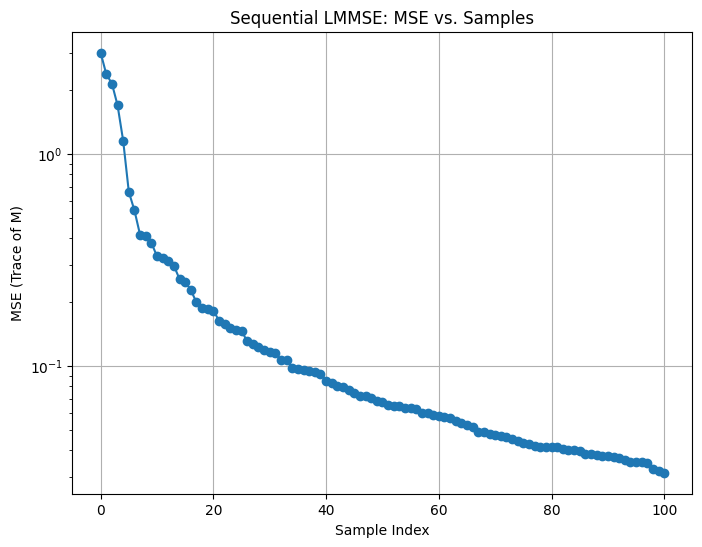

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma_w = 1.0
p = 3
N = 100

theta_true = np.random.randn(p)

H = np.random.randn(N, p)

theta_hat = np.zeros(p)
M = np.eye(p)

mse_values = [np.trace(M)]

for n in range(N):
    h_n = H[n, :].reshape(1, -1)

    # Observation
    w_n = np.random.normal(0, sigma_w)
    x_n = h_n @ theta_true + w_n

    # K[n]
    S = sigma_w**2 + h_n @ M @ h_n.T  # Scalar (1x1)
    K_n = (M @ h_n.T) / S             # (P x 1) vector

    # Update estimate theta_hat[n]
    theta_hat = theta_hat + (K_n.flatten() * (x_n - h_n @ theta_hat))

    # Update covariance matrix M[n]
    M = (np.eye(p) - K_n @ h_n) @ M

    mse_values.append(np.trace(M))

print(f"Final MSE (Trace of M) = {np.trace(M):.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(N + 1), mse_values, marker='o')
plt.xlabel("Sample Index")
plt.ylabel("MSE (Trace of M)")
plt.yscale('log')
plt.title("Sequential LMMSE: MSE vs. Samples")
plt.grid()
plt.show()
